In [51]:
#from fancyimpute import KNN

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt

In [80]:
filename = 'dataset_diabetes/diabetic_data.csv'

In [81]:
data = pd.read_csv(filename)

In [82]:
y_ternary = data.loc[:, data.columns == "readmitted"] # old 3-way classification
y = data.replace(to_replace={'>30': 'YES', '<30': 'YES'}).loc[:, data.columns == "readmitted"]
freq_readmission = y['readmitted'].value_counts().to_dict()
print(freq_readmission['YES']/sum(freq_readmission.values()))
X = data.drop(columns=["readmitted", "weight", "encounter_id", "patient_nbr"])

0.4608808442898414


In [83]:
X.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_1_desc',
       'diag_2_desc', 'diag_3_desc'],
      dtype='object')

In [84]:
lb = LabelBinarizer()
one = OneHotEncoder()

In [85]:
y_transformed = lb.fit_transform(y)
lb.classes_

array(['NO', 'YES'], dtype='<U3')

In [86]:
X_clean = X.replace("?", np.nan)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_transformed, test_size=0.20)

In [88]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp_unknown = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")

In [101]:
X_unknown_train = imp_unknown.fit_transform(X_train)
X_unknown_test = imp_unknown.transform(X_test)
print(X_unknown_train)

[['Caucasian' 'Female' '[70-80)' ...
  'ARTHROPATHIES AND RELATED DISORDERS ' 'OTHER FORMS OF HEART DISEASE '
  'CHRONIC OBSTRUCTIVE PULMONARY DISEASE AND ALLIED CONDITIONS ']
 ['Caucasian' 'Female' '[70-80)' ...
  'MALIGNANT NEOPLASM OF LYMPHATIC AND HEMATOPOIETIC TISSUE '
  'OTHER DISEASES OF RESPIRATORY SYSTEM '
  'DISEASES OF OTHER ENDOCRINE GLANDS ']
 ['Caucasian' 'Female' '[70-80)' ... 'ISCHEMIC HEART DISEASE '
  'OTHER FORMS OF HEART DISEASE ' 'PNEUMONIA AND INFLUENZA ']
 ...
 ['Caucasian' 'Male' '[80-90)' ... 'ISCHEMIC HEART DISEASE '
  'OTHER FORMS OF HEART DISEASE '
  'MALIGNANT NEOPLASM OF RESPIRATORY AND INTRATHORACIC ORGANS ']
 ['Caucasian' 'Female' '[60-70)' ...
  'COMPLICATIONS OF SURGICAL AND MEDICAL CARE, NOT ELSEWHERE CLASSIFIED '
  'DISEASES OF ARTERIES, ARTERIOLES, AND CAPILLARIES '
  'DISEASES OF OTHER ENDOCRINE GLANDS ']
 ['AfricanAmerican' 'Male' '[60-70)' ... 'OTHER FORMS OF HEART DISEASE '
  'CHRONIC OBSTRUCTIVE PULMONARY DISEASE AND ALLIED CONDITIONS '
  'DISE

In [90]:
X_mode_train = imp_mode.fit_transform(X_train)

In [68]:
X_mode_test = imp_mode.transform(X_test)

In [143]:
X_drop_train = X_train.dropna(axis=1)
X_drop_test = X_test.dropna(axis=1)

Index(['gender', 'age', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


In [102]:
enc_mode = OneHotEncoder(handle_unknown="ignore")
enc_unknown = OneHotEncoder(handle_unknown="ignore")
enc_drop = OneHotEncoder(handle_unknown="ignore")

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [141]:
X_unknown_train_c = enc_unknown.fit_transform(X_unknown_train)
X_unknown_test_c = enc_unknown.transform(X_unknown_test)
coef_labels_unknown = enc_unknown.get_feature_names([x + '&' for x in X.columns.tolist()])

X_mode_train_c = enc_mode.fit_transform(X_mode_train)
X_mode_test_c = enc_mode.transform(X_mode_test)
coef_labels_mode = enc_mode.get_feature_names(X.columns)

X_drop_train_c = enc_drop.fit_transform(X_drop_train)
X_drop_test_c = enc_drop.transform(X_drop_test)
coef_labels_drop = enc_drop.get_feature_names(X_drop_train.columns)

In [99]:
X_unknown_train_c.shape

(81412, 901)

In [73]:
y_train.shape

(81412, 1)

In [74]:
# classif = OneVsRestClassifier(LogisticRegression())
classif = LogisticRegression()
classif.fit(X_unknown_train_c, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
print(classif.score(X_unknown_test_c, y_test))
predictions = lb.inverse_transform(classif.predict(X_unknown_test_c))
print(sum(predictions == 'YES')/len(predictions)) # percentage of predictions labeled YES
# clf_unknown = OneVsRestClassifier(LogisticRegression()).fit(X_unknown_train_c, y_train)
clf_unknown = LogisticRegression().fit(X_unknown_train_c, y_train)

0.5057973862631424
0.38498575218630243


In [140]:
_, n = clf_unknown.coef_.shape
coefs = np.array([np.reshape(coef_labels_unknown, n), np.reshape(clf_unknown.coef_,n)]).tolist()
var_coefs = {}
for i in range(len(coefs[0])):
    result = coefs[0][i].split('&')
    var = result[0]
    coef = coefs[1][i]
    if var not in var_coefs:
        var_coefs[var] = [coef]
    else:
        var_coefs[var].append(coef)
var_avg = {}
for var in var_coefs:
    var_avg[var] = np.mean(var_coefs[var])
sorted_vars = sorted(list(var_avg.keys()), key= lambda x: var_avg[x])
print(sorted_vars)
print([var_avg[var] for var in sorted_vars])

['diag_3', 'diag_2', 'diag_3_desc', 'diag_2_desc', 'diag_1', 'diag_1_desc', 'num_lab_procedures', 'num_medications', 'medical_specialty', 'number_outpatient', 'number_emergency', 'discharge_disposition_id', 'number_inpatient', 'payer_code', 'admission_source_id', 'number_diagnoses', 'time_in_hospital', 'age', 'admission_type_id', 'num_procedures', 'race', 'chlorpropamide', 'glyburide-metformin', 'acarbose', 'miglitol', 'nateglinide', 'repaglinide', 'pioglitazone', 'glyburide', 'max_glu_serum', 'rosiglitazone', 'metformin', 'glimepiride', 'glipizide', 'A1Cresult', 'insulin', 'tolazamide', 'gender', 'glimepiride-pioglitazone', 'troglitazone', 'glipizide-metformin', 'acetohexamide', 'tolbutamide', 'metformin-pioglitazone', 'metformin-rosiglitazone', 'diabetesMed', 'change', 'examide', 'citoglipton']
[0.00018966409829311153, 0.00020958679767136656, 0.00021782383341476205, 0.00024214397012587818, 0.0002934215167004358, 0.00039588617332717333, 0.00043001429175732294, 0.0006833103813693693, 0

In [77]:
# clf_mode = OneVsRestClassifier(LogisticRegression()).fit(X_mode_train_c, y_train)
clf_mode = LogisticRegression().fit(X_mode_train_c, y_train)

In [78]:
# clf_drop = OneVsRestClassifier(LogisticRegression()).fit(X_drop_train_c, y_train)
clf_drop = LogisticRegression().fit(X_drop_train_c, y_train)

In [79]:
print(clf_unknown.score(X_unknown_test_c, y_test))
print(clf_mode.score(X_mode_test_c, y_test))
print(clf_drop.score(X_drop_test_c, y_test))

0.6406603124692936
0.638842487963054
0.6365333595362092


In [149]:
def classify(filename):
    print(filename)
    data = pd.read_csv(filename)
    y = data.replace(to_replace={'>30': 'YES', '<30': 'YES'}).loc[:, data.columns == "readmitted"]
    X = data.drop(columns=[
        "readmitted",
        "weight", 
        "encounter_id", 
        "patient_nbr", 
        "diag_1", 
        "diag_2", 
        "diag_3"
        ])
    lb = LabelBinarizer()
    one = OneHotEncoder()
    y_transformed = lb.fit_transform(y)
    X_clean = X.replace("?", np.nan)
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_transformed, test_size=0.20)
    imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
    imp_unknown = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value="Unknown")
    X_unknown_train = imp_unknown.fit_transform(X_train)
    X_unknown_test = imp_unknown.transform(X_test)
    X_mode_train = imp_mode.fit_transform(X_train)
    X_mode_test = imp_mode.transform(X_test)
    X_drop_train = X_train.dropna(axis=1)
    X_drop_test = X_test.dropna(axis=1)
    enc_mode = OneHotEncoder(handle_unknown="ignore")
    enc_unknown = OneHotEncoder(handle_unknown="ignore")
    enc_drop = OneHotEncoder(handle_unknown="ignore")
    
    X_unknown_train_c = enc_unknown.fit_transform(X_unknown_train)
    X_unknown_test_c = enc_unknown.transform(X_unknown_test)
    coef_labels_unknown = enc_unknown.get_feature_names([x + '&' for x in X.columns.tolist()])

    X_mode_train_c = enc_mode.fit_transform(X_mode_train)
    X_mode_test_c = enc_mode.transform(X_mode_test)
    coef_labels_mode = enc_mode.get_feature_names(X.columns)

    X_drop_train_c = enc_drop.fit_transform(X_drop_train)
    X_drop_test_c = enc_drop.transform(X_drop_test)
    coef_labels_drop = enc_drop.get_feature_names(X_drop_train.columns)

    classif = LogisticRegression()
    classif.fit(X_unknown_train_c, y_train)
    
    classif.score(X_unknown_test_c, y_test)
    predictions = lb.inverse_transform(classif.predict(X_unknown_test_c))
    print('percentage of predictions labeled YES:', sum(predictions == 'YES')/len(predictions))
    
    clf_unknown = LogisticRegression().fit(X_unknown_train_c, y_train)
    get_coefs(clf_unknown, coef_labels_unknown)
    clf_mode = LogisticRegression().fit(X_mode_train_c, y_train)
    get_coefs(clf_mode, coef_labels_mode)
    clf_drop = LogisticRegression().fit(X_drop_train_c, y_train)
    get_coefs(clf_drop, coef_labels_drop)
    
    unknown_score = clf_unknown.score(X_unknown_test_c, y_test)
    mode_score = clf_mode.score(X_mode_test_c, y_test)
    drop_score = clf_drop.score(X_drop_test_c, y_test)
    
    print('unknown test error:', unknown_score)
    print('mode test error:', mode_score)
    print('drop test error:', drop_score)
    
    return unknown_score, mode_score, drop_score

def get_coefs(clf, feature_names):
    _, n = clf.coef_.shape
    coefs = np.array([np.reshape(feature_names, n), np.reshape(clf.coef_,n)]).tolist()
    var_coefs = {}
    raw_coefs = {}
    for i in range(len(coefs[0])):
        result = coefs[0][i].split('&')
        var = result[0]
        coef = coefs[1][i]
        if var not in var_coefs:
            var_coefs[var] = [abs(coef)]
        else:
            var_coefs[var].append(abs(coef))
        raw_coefs[coefs[0][i]] = abs(coef)
    var_avg = {}
    for var in var_coefs:
        var_avg[var] = np.mean(var_coefs[var])
    sorted_vars = sorted(list(raw_coefs.keys()), key= lambda x: raw_coefs[x], reverse = True)
    raw_values = pd.DataFrame({
        'raw_coef': sorted_vars[:10],
        'val': [raw_coefs[var] for var in sorted_vars[:10]]
    })
    print(raw_values.to_latex())
    sorted_vars_avg = sorted(list(var_avg.keys()), key= lambda x: var_avg[x], reverse = True)
    avg_values = pd.DataFrame({
        'avg_coef': sorted_vars_avg[:10],
        'val': [var_avg[var] for var in sorted_vars_avg[:10]]
    })
    print(avg_values.to_latex())
    
files = [
    'dataset_diabetes/diabetic_data.csv', 
    'dataset_diabetes/diabetic_data_clustered1.csv',
    'dataset_diabetes/diabetic_data_clustered2.csv',
    'dataset_diabetes/diabetic_data_clustered3.csv',
    'dataset_diabetes/diabetic_data_clustered4.csv',
    'dataset_diabetes/diabetic_data_clustered5.csv',
]

accuracies = {}
unknown_accuracies = []
mode_accuracies = []
drop_accuracies = []
for file in files:
    result = classify(file)
    accuracies[file] = result
    unknown_accuracies.append(result[0])
    mode_accuracies.append(result[1])
    drop_accuracies.append(result[2])
df_accuracy = pd.DataFrame({
    'file': files, 
    'unknown': unknown_accuracies,
    'mode': mode_accuracies,
    'drop': drop_accuracies
})

print(df_accuracy.to_latex())

dataset_diabetes/diabetic_data.csv


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.36975533064753857
\begin{tabular}{llr}
\toprule
{} &                      raw\_coef &       val \\
\midrule
0 &  discharge\_disposition\_id\&\_11 &  5.254451 \\
1 &  discharge\_disposition\_id\&\_14 &  2.292742 \\
2 &           number\_inpatient\&\_0 &  1.681499 \\
3 &          admission\_type\_id\&\_7 &  1.581700 \\
4 &  discharge\_disposition\_id\&\_15 &  1.357252 \\
5 &  discharge\_disposition\_id\&\_13 &  1.314563 \\
6 &          number\_inpatient\&\_11 &  1.292421 \\
7 &          number\_emergency\&\_10 &  1.142797 \\
8 &           number\_inpatient\&\_1 &  1.126665 \\
9 &           number\_emergency\&\_0 &  1.098930 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef &       val \\
\midrule
0 &  discharge\_disposition\_id &  0.819382 \\
1 &          number\_inpatient &  0.569192 \\
2 &   metformin-rosiglitazone &  0.454738 \\
3 &       glyburide-metformin &  0.442071 \\
4 &         admission\_type\_i

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.3775670629851626
\begin{tabular}{llr}
\toprule
{} &                                           raw\_coef &       val \\
\midrule
0 &                       discharge\_disposition\_id\&\_11 &  5.277066 \\
1 &                       discharge\_disposition\_id\&\_14 &  2.059569 \\
2 &                                number\_inpatient\&\_0 &  1.682145 \\
3 &                       discharge\_disposition\_id\&\_13 &  1.383959 \\
4 &                               admission\_type\_id\&\_7 &  1.322209 \\
5 &                               number\_inpatient\&\_11 &  1.275093 \\
6 &  diag\_3\_desc\&\_PERSONS ENCOUNTERING HEALTH SERVI... &  1.245800 \\
7 &                       discharge\_disposition\_id\&\_15 &  1.209210 \\
8 &                               number\_emergency\&\_10 &  1.196816 \\
9 &                                number\_inpatient\&\_1 &  1.147713 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef &     

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.3879827061019947
\begin{tabular}{llr}
\toprule
{} &                                           raw\_coef &       val \\
\midrule
0 &                       discharge\_disposition\_id\&\_11 &  5.198247 \\
1 &                       discharge\_disposition\_id\&\_14 &  1.935061 \\
2 &                                number\_inpatient\&\_0 &  1.578647 \\
3 &  diag\_3\_desc\&\_NORMAL DELIVERY, AND OTHER INDICA... &  1.505580 \\
4 &                       discharge\_disposition\_id\&\_13 &  1.370275 \\
5 &                               admission\_type\_id\&\_7 &  1.356606 \\
6 &                               number\_inpatient\&\_11 &  1.351820 \\
7 &                       discharge\_disposition\_id\&\_15 &  1.268211 \\
8 &                       discharge\_disposition\_id\&\_28 &  1.239127 \\
9 &          medical\_specialty\&\_Pediatrics-Pulmonology &  1.185566 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef &    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.393681831581016
\begin{tabular}{llr}
\toprule
{} &                                           raw\_coef &       val \\
\midrule
0 &                       discharge\_disposition\_id\&\_11 &  5.239162 \\
1 &                       discharge\_disposition\_id\&\_14 &  1.941787 \\
2 &       diag\_1\_desc\&\_Excessive vomiting in pregnancy &  1.565339 \\
3 &                                number\_inpatient\&\_0 &  1.514969 \\
4 &                       discharge\_disposition\_id\&\_13 &  1.494494 \\
5 &  diag\_3\_desc\&\_Pneumococcal pneumonia [Streptoco... &  1.489765 \\
6 &  diag\_1\_desc\&\_Other complications of pregnancy,... &  1.430371 \\
7 &  diag\_1\_desc\&\_Abnormality of organs and soft ti... &  1.418764 \\
8 &                      diag\_1\_desc\&\_Myeloid leukemia &  1.416013 \\
9 &                               number\_inpatient\&\_11 &  1.413676 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef &    

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.40714355900560084
\begin{tabular}{llr}
\toprule
{} &                                           raw\_coef &       val \\
\midrule
0 &                       discharge\_disposition\_id\&\_11 &  5.221748 \\
1 &                       discharge\_disposition\_id\&\_14 &  1.988314 \\
2 &                                number\_inpatient\&\_0 &  1.533769 \\
3 &  diag\_1\_desc\&\_Strabismus and other disorders of... &  1.510282 \\
4 &                       discharge\_disposition\_id\&\_13 &  1.412517 \\
5 &                  diag\_1\_desc\&\_Diseases of the jaws &  1.384487 \\
6 &                        diag\_1\_desc\&\_Atheroembolism &  1.373175 \\
7 &  diag\_3\_desc\&\_Muscular dystrophies and other my... &  1.320763 \\
8 &                               admission\_type\_id\&\_7 &  1.307336 \\
9 &       diag\_2\_desc\&\_Abscess of lung and mediastinum &  1.296712 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef & 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


percentage of predictions labeled YES: 0.40527660410730076
\begin{tabular}{llr}
\toprule
{} &                                           raw\_coef &       val \\
\midrule
0 &                       discharge\_disposition\_id\&\_11 &  5.185521 \\
1 &                       discharge\_disposition\_id\&\_14 &  2.124244 \\
2 &          diag\_1\_desc\&\_Hereditary hemolytic anemias &  1.609773 \\
3 &                                number\_inpatient\&\_0 &  1.534547 \\
4 &       diag\_2\_desc\&\_Abscess of lung and mediastinum &  1.446852 \\
5 &                 diag\_3\_desc\&\_Crystal arthropathies &  1.411905 \\
6 &  diag\_1\_desc\&\_Other disorders of pancreatic int... &  1.394181 \\
7 &                      diag\_1\_desc\&\_Myeloid leukemia &  1.390486 \\
8 &                       discharge\_disposition\_id\&\_15 &  1.359628 \\
9 &           diag\_2\_desc\&\_Fracture of radius and ulna &  1.341966 \\
\bottomrule
\end{tabular}

\begin{tabular}{llr}
\toprule
{} &                  avg\_coef & 

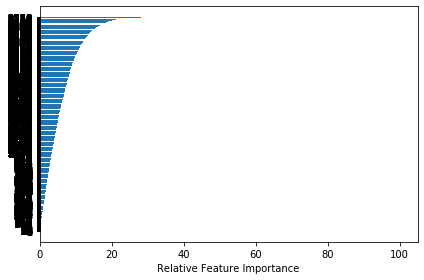

In [32]:
feature_importance = abs(clf_unknown.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
#featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [49]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(data.loc[:, data.columns != "readmitted"], data.loc[:, data.columns == "readmitted"])
#clf.predict(X[:2, :])

ValueError: could not convert string to float: 'No'

In [ ]:
int disp[2][4] = {
    {10, 11, 12, 13},
    {14, 15, 16, 17}
};

In [ ]:
 (1 / (delta_fil + 1)) * (1 / (delta_rnk + 1))

In [4]:
for delta_fil in range(0,9): 
    s = "{"
    for delta_rnk in range(0, 9):
        s += str((1 / (delta_fil + 1.0)) * (1 / (delta_rnk + 1.0))) + ','
        
    print(s[:-1]+"},")
        

{1.0,0.5,0.3333333333333333,0.25,0.2,0.16666666666666666,0.14285714285714285,0.125,0.1111111111111111},
{0.5,0.25,0.16666666666666666,0.125,0.1,0.08333333333333333,0.07142857142857142,0.0625,0.05555555555555555},
{0.3333333333333333,0.16666666666666666,0.1111111111111111,0.08333333333333333,0.06666666666666667,0.05555555555555555,0.047619047619047616,0.041666666666666664,0.037037037037037035},
{0.25,0.125,0.08333333333333333,0.0625,0.05,0.041666666666666664,0.03571428571428571,0.03125,0.027777777777777776},
{0.2,0.1,0.06666666666666667,0.05,0.04000000000000001,0.03333333333333333,0.02857142857142857,0.025,0.022222222222222223},
{0.16666666666666666,0.08333333333333333,0.05555555555555555,0.041666666666666664,0.03333333333333333,0.027777777777777776,0.023809523809523808,0.020833333333333332,0.018518518518518517},
{0.14285714285714285,0.07142857142857142,0.047619047619047616,0.03571428571428571,0.02857142857142857,0.023809523809523808,0.02040816326530612,0.017857142857142856,0.0158730158

In [5]:
ARR_WIDTH = 16

In [7]:
FIL_ORIGIN = 2

In [8]:
RNK_ORIGIN = ((ARR_WIDTH - BOARD_WIDTH) / 2)

In [17]:
for f in range(-1,9): 
    s = "{"
    for r in range(-1, 9):
        s += str(int(ARR_WIDTH * (FIL_ORIGIN + f) + RNK_ORIGIN + r)) + ','
        
    print(s[:-1]+"},")

{51,52,53,54,55,56,57,58,59,60},
{67,68,69,70,71,72,73,74,75,76},
{83,84,85,86,87,88,89,90,91,92},
{99,100,101,102,103,104,105,106,107,108},
{115,116,117,118,119,120,121,122,123,124},
{131,132,133,134,135,136,137,138,139,140},
{147,148,149,150,151,152,153,154,155,156},
{163,164,165,166,167,168,169,170,171,172},
{179,180,181,182,183,184,185,186,187,188},
{195,196,197,198,199,200,201,202,203,204},


In [18]:
FIL_MASK = 15
FIL_SHIFT = 4
RNK_MASK = 15
RNK_SHIFT = 0

In [26]:
s = "{"
for sq in range(51,205): 
    s += str(int(((sq >> FIL_SHIFT) & FIL_MASK) - FIL_ORIGIN)) + ','
        
print(s[:-1]+"}")

#fil_t f = ((sq >> FIL_SHIFT) & FIL_MASK) - FIL_ORIGIN;

#rnk_t r = ((sq >> RNK_SHIFT) & RNK_MASK) - RNK_ORIGIN;

{-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8}


In [29]:
s = "{"
for sq in range(51,205): 
    s += str(int(((sq >> RNK_SHIFT) & RNK_MASK) - RNK_ORIGIN)) + ','
print(s[:-1]+"}")

{-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8}
